In [2]:
!pip install --upgrade pip
!pip install pyathena

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
  Using cached pyathena-3.3.0-py3-none-any.whl.metadata (86 kB)
  Using cached urllib3-2.0.7-py3-none-any.whl.metadata (6.6 kB)
Using cached pyathena-3.3.0-py3-none-any.whl (80 kB)
Using cached urllib3-2.0.7-py3-none-any.whl (124 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.1.0
    Uninstalling urllib3-2.1.0:
      Successfully uninstalled urllib3-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
distributed 2022.7.0 requires tornado<6.2,>=6.0.3, but you have tornado 6.4 which is incompatible.
sagemaker 2.199.0 requires urllib3<1.27, but you have urllib3 2.0.7 which is incompati

In [3]:
#Upgrade de la version de seaborn para poder hacer graficos mas facil 
!pip install seaborn==0.12.2

  Using cached seaborn-0.12.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [4]:
#Libraries
from pyathena import connect
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


# Traigo datos de receiver y receiver_fraud 

In [38]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name = 'viamericas'
tabla = 'receiver'
tabla1 = 'receiver_fraud'


In [74]:
#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df_branch = pd.read_sql(f'SELECT id_branch, min(DATE_RECEIVER) primer, max(DATE_RECEIVER) ultima, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla} GROUP BY id_branch;', conn)
df_branch_fraud = pd.read_sql(f'SELECT r.id_branch, min(r.DATE_RECEIVER) primer, max(r.DATE_RECEIVER) ultima, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla1} rf INNER JOIN {origin_name}.{database_name}.{tabla} r ON rf.ID_BRANCH = r.ID_BRANCH AND rf.ID_RECEIVER = r.ID_RECEIVER GROUP BY r.id_branch;', conn)


/tmp/ipykernel_17/2123696069.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_branch = pd.read_sql(f'SELECT id_branch, min(DATE_RECEIVER) primer, max(DATE_RECEIVER) ultima, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla} GROUP BY id_branch;', conn)
/tmp/ipykernel_17/2123696069.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_branch_fraud = pd.read_sql(f'SELECT r.id_branch, min(r.DATE_RECEIVER) primer, max(r.DATE_RECEIVER) ultima, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla1} rf INNER JOIN {origin_name}.{database_name}.{tabla} r ON rf.ID_BRANCH = r.ID_BRANCH AND rf.ID_RECEIVER = r.ID_RECEIVER GROUP BY r.id_branch;', conn)


In [75]:
df_branch_hora = pd.read_sql(f'SELECT id_branch, hour(DATE_RECEIVER) hora, COUNT(*) cant FROM	{origin_name}.{database_name}.{tabla} GROUP BY id_branch, hour(DATE_RECEIVER);', conn)
df_branch_dia = pd.read_sql(f'SELECT id_branch, day_of_week(DATE_RECEIVER) dia, COUNT(*) cant FROM	{origin_name}.{database_name}.{tabla} GROUP BY id_branch, day_of_week(DATE_RECEIVER);', conn)
df_branch_fraud_cant = pd.read_sql(f'SELECT r.id_branch, year( r.DATE_RECEIVER) anio, month( r.DATE_RECEIVER) mes, day( r.DATE_RECEIVER) dia, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla1} rf INNER JOIN {origin_name}.{database_name}.{tabla} r ON rf.ID_BRANCH = r.ID_BRANCH AND rf.ID_RECEIVER = r.ID_RECEIVER GROUP BY r.id_branch, year( r.DATE_RECEIVER), month( r.DATE_RECEIVER), day( r.DATE_RECEIVER);', conn)


/tmp/ipykernel_17/2361013202.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_branch_hora = pd.read_sql(f'SELECT id_branch, hour(DATE_RECEIVER) hora, COUNT(*) cant FROM	{origin_name}.{database_name}.{tabla} GROUP BY id_branch, hour(DATE_RECEIVER);', conn)
/tmp/ipykernel_17/2361013202.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_branch_dia = pd.read_sql(f'SELECT id_branch, day_of_week(DATE_RECEIVER) dia, COUNT(*) cant FROM	{origin_name}.{database_name}.{tabla} GROUP BY id_branch, day_of_week(DATE_RECEIVER);', conn)
/tmp/ipykernel_17/2361013202.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAP

In [76]:
#dia = ['day']
#df_branch_fraud_cant = pd.read_sql(f'SELECT r.id_branch, DATE_TRUNC(%s, r.DATE_RECEIVER) dia_fraude, COUNT(*) transacciones FROM {origin_name}.{database_name}.{tabla1} rf INNER JOIN {origin_name}.{database_name}.{tabla} r ON rf.ID_BRANCH = r.ID_BRANCH AND rf.ID_RECEIVER = r.ID_RECEIVER GROUP BY r.id_branch;', conn, params=dia)

#query = "SELECT r.id_branch,  DATE_TRUNC( %s, r.DATE_RECEIVER) dia_fraude, COUNT(*) transacciones FROM AwsDataCatalog.viamericas.receiver_fraud rf INNER JOIN AwsDataCatalog.viamericas.receiver r ON rf.ID_BRANCH = r.ID_BRANCH AND rf.ID_RECEIVER = r.ID_RECEIVER GROUP BY r.id_branch,  DATE_TRUNC(%s, r.DATE_RECEIVER) ;"
#params = ['day']
#df = pd.read_sql(query, conn)


In [77]:
df_branch.head()

,id_branch,primer,ultima,transacciones
0,A18548,2020-02-12 16:33:06.137,2024-02-03 16:07:04.433,16626
1,A16117,2020-02-12 16:49:41.650,2024-02-03 19:21:16.040,38994
2,A18388,2020-02-12 16:24:42.630,2024-02-03 20:52:16.983,30782
3,A17194,2020-02-12 17:33:36.073,2024-02-03 19:28:18.980,32173
4,A18888,2020-02-12 16:06:04.310,2024-02-03 19:52:30.047,21553


In [78]:
df_branch_fraud_cant.head()

,id_branch,anio,mes,dia,transacciones
0,A22763,2023,1,5,6
1,A20834,2022,12,23,8
2,A05706,2022,3,25,5
3,A17079,2022,5,17,2
4,A21323,2022,6,11,7


# Variables para branch total y en los fraudes
Total transacciones y promedio diario (antiguedad en dias)

Total de dias desde primer operacion

Dias hasta primer fraude

FALTA Tiempo promedio entre transacciones

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

Text(0.5, 1.0, 'Fraudes')

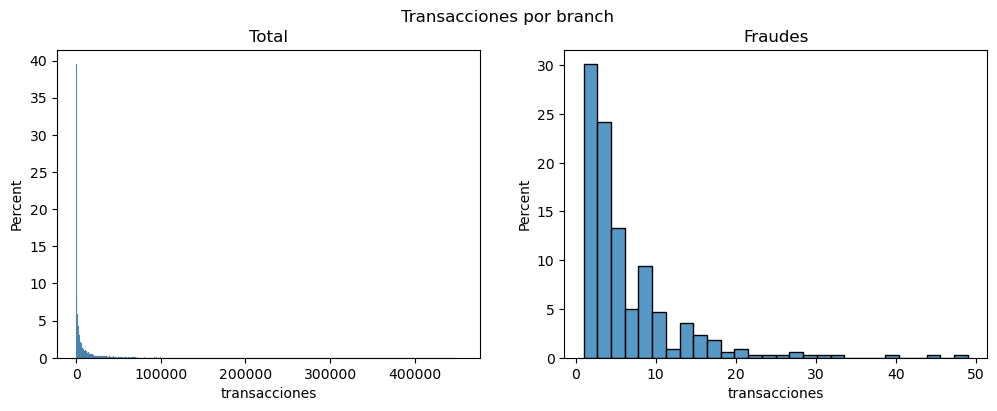

In [79]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Transacciones por branch')
sns.histplot(data = df_branch, x = 'transacciones', ax = axs[0], stat='percent').set_title('Total')
sns.histplot(data = df_branch_fraud, x ='transacciones', ax = axs[1], stat='percent').set_title('Fraudes')

In [80]:
#Calculo dias de antiguedad de la branch y dias hasta primer fraude
df_branch['dif_dias'] = (df_branch['ultima'] - df_branch['primer']).dt.days
df_branch_fraud['dif_dias'] = (df_branch_fraud['ultima'] - df_branch_fraud['primer']).dt.days

#Calculo promedio de transacciones por dia. OJO q esta calculado a dias abiertos y no a dias q opero
df_branch['prom_diario'] = df_branch['dif_dias']/df_branch['transacciones']
df_branch_fraud['prom_diario'] = df_branch_fraud['dif_dias']/df_branch_fraud['transacciones']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

Text(0.5, 1.0, 'Fraudes')

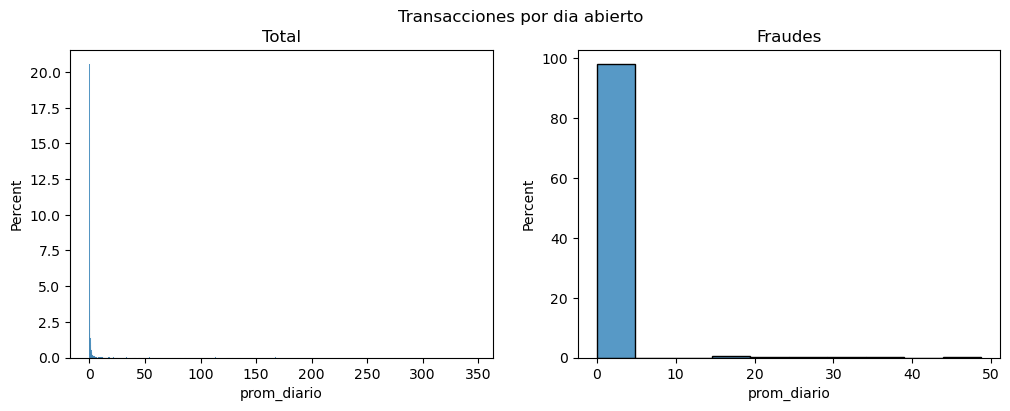

In [81]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Transacciones por dia abierto')
sns.histplot(data = df_branch, x = 'prom_diario', ax = axs[0], stat='percent').set_title('Total')
sns.histplot(data = df_branch_fraud, x ='prom_diario', ax = axs[1], stat='percent').set_title('Fraudes')

In [82]:
df_branch_fraud[df_branch_fraud['prom_diario']>10]

,id_branch,primer,ultima,transacciones,dif_dias,prom_diario
0,A18391,2022-08-12 21:40:04.417,2023-04-22 19:27:51.687,8,252,31.500000
8,A16136,2022-02-09 13:56:55.140,2023-02-05 16:33:09.453,14,361,25.785714
14,A23364,2023-03-18 12:31:09.653,2023-06-08 18:56:43.303,5,82,16.400000
83,A19658,2022-09-24 18:56:24.150,2022-11-21 15:23:32.467,3,57,19.000000
175,A22037,2022-09-03 18:02:12.407,2023-06-06 22:29:26.623,8,276,34.500000
240,A05706,2022-03-25 19:24:30.830,2023-09-02 19:10:37.683,24,525,21.875000
271,A23733,2023-01-26 09:21:55.793,2024-01-02 11:33:10.120,7,341,48.714286


In [83]:
df_branch_fraud.iloc[102,]
df_branch_fraud[df_branch_fraud['id_branch']=='A22037    ']

,id_branch,primer,ultima,transacciones,dif_dias,prom_diario
175,A22037,2022-09-03 18:02:12.407,2023-06-06 22:29:26.623,8,276,34.5


In [84]:
df_branch[df_branch['id_branch']=='A22037    ']

,id_branch,primer,ultima,transacciones,dif_dias,prom_diario
4207,A22037,2021-12-22 16:21:58.157,2024-02-03 20:56:28.430,25995,773,0.029736


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

Text(0.5, 1.0, 'Dias hasta Fraude')

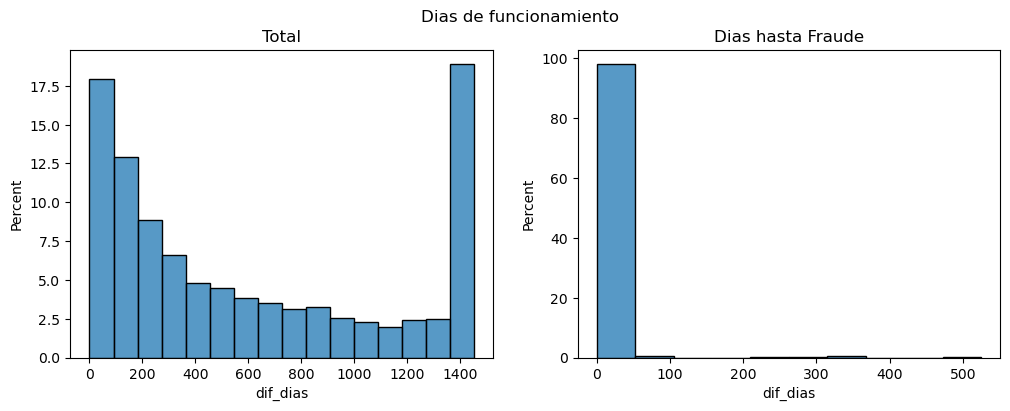

In [85]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('Dias de funcionamiento')
sns.histplot(data = df_branch, x = 'dif_dias', ax = axs[0], stat='percent').set_title('Total')
sns.histplot(data = df_branch_fraud, x ='dif_dias', ax = axs[1], stat='percent').set_title('Dias hasta Fraude')

In [86]:
df_branch_fraud[df_branch_fraud['dif_dias']>50]

,id_branch,primer,ultima,transacciones,dif_dias,prom_diario
0,A18391,2022-08-12 21:40:04.417,2023-04-22 19:27:51.687,8,252,31.500000
8,A16136,2022-02-09 13:56:55.140,2023-02-05 16:33:09.453,14,361,25.785714
14,A23364,2023-03-18 12:31:09.653,2023-06-08 18:56:43.303,5,82,16.400000
83,A19658,2022-09-24 18:56:24.150,2022-11-21 15:23:32.467,3,57,19.000000
175,A22037,2022-09-03 18:02:12.407,2023-06-06 22:29:26.623,8,276,34.500000
240,A05706,2022-03-25 19:24:30.830,2023-09-02 19:10:37.683,24,525,21.875000
271,A23733,2023-01-26 09:21:55.793,2024-01-02 11:33:10.120,7,341,48.714286


In [95]:
df_branch_fraud['dif_dias'].value_counts().sort_index()

dif_dias
0      328
1        2
2        2
57       1
82       1
252      1
276      1
341      1
361      1
525      1
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Dias hasta Fraude')

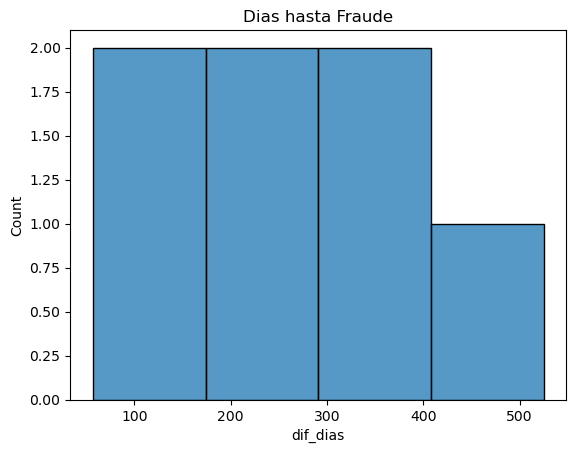

In [88]:
sns.histplot(data = df_branch_fraud[df_branch_fraud['dif_dias']>5], x ='dif_dias').set_title('Dias hasta Fraude')

## Agencias con mas de un fraude

In [89]:
df_branch_fraud_cant.head()

,id_branch,anio,mes,dia,transacciones
0,A22763,2023,1,5,6
1,A20834,2022,12,23,8
2,A05706,2022,3,25,5
3,A17079,2022,5,17,2
4,A21323,2022,6,11,7


In [90]:
df_branch_fraud_anio = df_branch_fraud_cant[['id_branch']].value_counts().reset_index().rename(columns={0: "count"})

In [92]:
df_branch_fraud_anio.loc[df_branch_fraud_anio['count'].between(2, 50, 'both')] 

,id_branch,count
0,A23364,3
1,A05706,3
2,A21279,3
3,A18045,3
4,A22995,2
5,A18391,2
6,A22176,2
7,A23733,2
8,A16136,2
9,A22037,2


In [99]:
df_branch_fraud_cant[df_branch_fraud_cant['id_branch']=='A23364    ']

,id_branch,anio,mes,dia,transacciones
41,A23364,2023,5,3,1
104,A23364,2023,6,8,2
117,A23364,2023,3,18,2
